## Import libraries

In [1]:
import numpy as np
import pandas as pd

## Load the data

In [2]:
data = pd.read_csv('BankChurners.csv', index_col='CLIENTNUM')

In [3]:
# Deleting the last two columns
data = data.iloc[:,:-2]

In [4]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
data.shape

(10127, 20)

In [5]:
# There is no missing value
100*data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
# Statistical resume
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [7]:
# Categorical features
columns = (data.dtypes == 'object')
object_cols = list(columns[columns].index)
print('Categorical variables:')
print(object_cols)

Categorical variables:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [8]:
# More imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

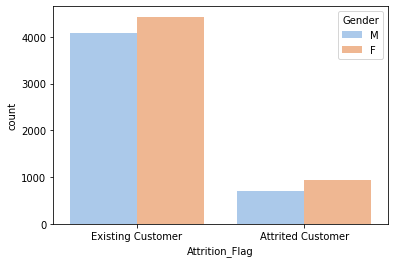

In [9]:
# Let's explore the data
sns.countplot(x='Attrition_Flag',hue='Gender',data=data,palette='pastel')

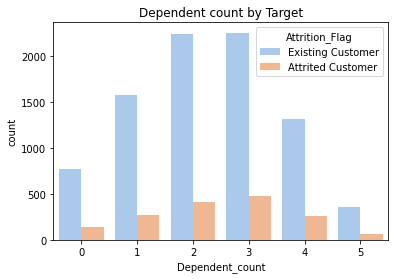

In [10]:
plt.title('Dependent count by Target')
sns.countplot(x='Dependent_count',hue='Attrition_Flag',data=data,palette='pastel')
# 2 and 3 dependent count is the most common

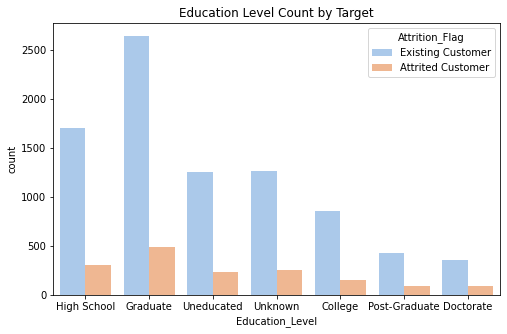

In [11]:
plt.figure(figsize=(8,5))
plt.title('Education Level Count by Target')
sns.countplot(x='Education_Level',hue='Attrition_Flag',data=data,palette='pastel')
# Most customers are in the level of graduate

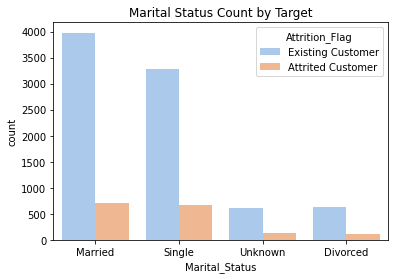

In [12]:
plt.title('Marital Status Count by Target')
sns.countplot(x='Marital_Status',hue='Attrition_Flag',data=data,palette='pastel')
# Most customers are married or single

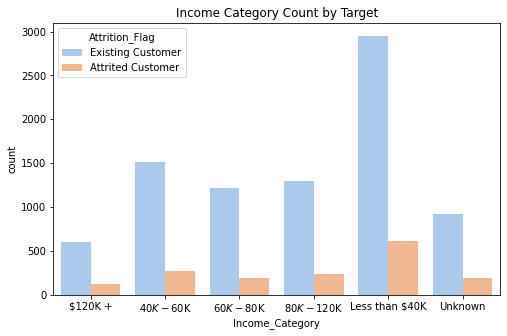

In [14]:
plt.figure(figsize=(8,5))
plt.title('Income Category Count by Target')
income_order = sorted(data['Income_Category'].unique())
sns.countplot(x='Income_Category',hue='Attrition_Flag',order=income_order,data=data,palette='pastel')
# And they receive less than 40k

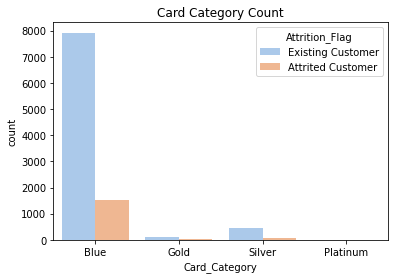

In [15]:
plt.title('Card Category Count')
sns.countplot(x='Card_Category',hue='Attrition_Flag',data=data,palette='pastel')

## Modeling the Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder = LabelEncoder()

In [18]:
# Transforming the card category variable
for n in data:
    data.loc[(data['Card_Category'] == 'Gold') | (data['Card_Category'] == 'Platinum')
             , 'Card_Category'] = 'Other'
data.Card_Category.value_counts()

Blue      9436
Silver     555
Other      136
Name: Card_Category, dtype: int64

In [19]:
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [20]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Spliting the Data

In [22]:
X = data.drop('Attrition_Flag',axis=1)
y = data['Attrition_Flag']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# First let's choose some of the more common models for cross-validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
kfold = StratifiedKFold(n_splits=10)

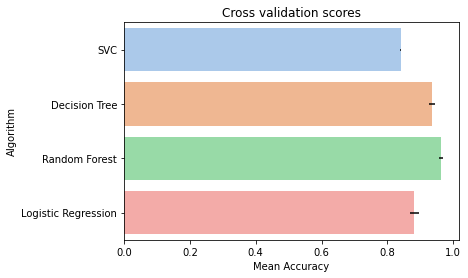

In [26]:
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValErrors':cv_std,'Algorithm':['SVC','Decision Tree', 'Random Forest', 'Logistic Regression']})

g = sns.barplot('CrossValMeans','Algorithm',data = cv_res, palette='pastel',orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

In [104]:
cv_means

[0.8404345262285545, 0.93595061079104, 0.9628961376331748, 0.8824812937773423]

In [91]:
# The Random Forest perform better for this data
rfc = RandomForestClassifier(n_estimators=300,max_features=5,max_leaf_nodes=250,random_state=42)

### Training the Model

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=5, max_leaf_nodes=250, n_estimators=300,
                       random_state=42)

### Predictions

In [93]:
rfc_pred = rfc.predict(X_test)

### Evaluating the Model

In [78]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [94]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       496
           1       0.97      0.99      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [98]:
print(roc_auc_score(rfc_pred,y_test))

0.9512454774271507


In [ ]:
# Our model was capable to explain more than 95% of the attrition flag

## Saving the Model

In [99]:
import joblib

In [100]:
filename = 'Bank_Churners_model.joblib'

In [101]:
joblib.dump(rfc, filename)

['Bank_Churners_model.joblib']